<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Supervised Learning

In this notebook you will learn a bit more about supervised learning. 

## Data

For the following assignment we will use the housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository. There are 506 samples and 12 feature variables in this dataset. The objective of the assignment is to predict the value of prices of the houses using the given features.

Let's get started from importing some useful packages and loading the dataset `boston.csv`.

In [1]:
import numpy as np
import pandas as pd

df_boston = pd.read_csv('/home/jovyan/Data/boston.csv')

Let's get more familiar with the dataset.

In [2]:
df_boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Now let's understand better the meaning of the variables. Boston dataset contains the following information (in order):
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town
* `CHAS` - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per 10,000 dollars
* `PTRATIO` - pupil-teacher ratio by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

**Note** The price of the houses is the target, i.e. what we want to predict. 

## Data exploration

Let's check if there are any missing values in the dataframe.

In [3]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

As you see above there are no missing values, thus we can proceed with taking a more close look to the data. 

Let's start from visualizing the price, which is our target variable.

(Optionally) If you are interested in how nice visualization can be done using `seaborn` library, we encourage you to explore `help(sns.distplot)` in a cell or check the documentation [here](https://seaborn.pydata.org/generated/seaborn.distplot.html). 

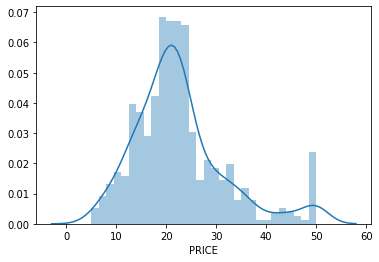

In [4]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

sns.distplot(df_boston['PRICE'], bins=30)
plt.show()

On the plot we can see that the values of the price resembles a normal distributed with a few outliers.

Now let's explore the features and their relation with the price. Running the following cell you can get a summary of descriptive statistic for the dataset.

In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Let's also take a look at the correlation between features and the price.

A common way to explore your dataset is to look at a correlation matrix of the features. The correlation matrix shows the correlations between the features on the x-axis with the features on the y-axis. 
It is convenient to use graphical representation of the correlation matrix using the correlation matrix heatmap. 

The `heatmap` plots the correlation matrix in a colour-encoded form, so we first need to compute correlations using `corr()` method included in Pandas. Then the resulting matrix is used as an input to seaborn's function `heatmap()`. 

Remember, that it makes sense to consider the correlations between numerical features.

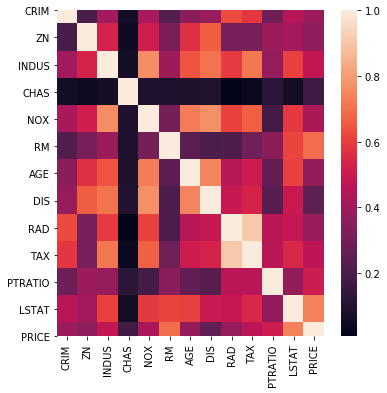

In [6]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(abs(df_boston.corr()),ax=ax)

From the above correlation matrix heatmap we see that all the features, including the price, correlates perfectly with itself (as it should be, see the diagonal). Moreover, the price is highly correlated with features RM (average number of rooms per dwelling) and LSTAT (% lower status of the population). 

Let's investigate those correlations in more detail. To see relationships between two variables we will use `lmplot()`. For more details on `sns.lmplot` do not hesitate to check seaborn's [documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html). 

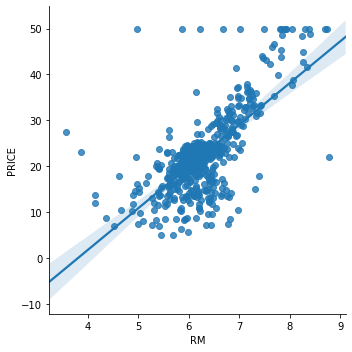

In [7]:
sns.lmplot(x='RM',y='PRICE',data=df_boston)

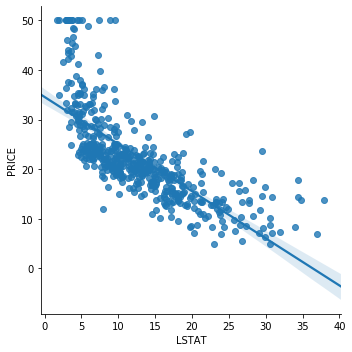

In [8]:
sns.lmplot(x='LSTAT',y='PRICE',data=df_boston)

Indeed, on the above plots you can see, that these two features RM and LSTAT might be good for the starting model for price prediction.

## Linear regression

Recall from the reading material that for supervised learning it is important to select two parts of the data for training and test purposes. In the upcoming tasks you will be asked to select train and test sets and implement a linear regression model. 

### Q1: 

Using the two features above, LSTAT and RM, select the training and test sets from `df_boston`. Use `test_size`=0.3 and `random_state`=1235.

**Hint:** 

* import the necessary module from scikit-learn
* select features
* create the variables `X_train`, `y_train`, `X_test` and `y_test` for the training and testing the future model

In [10]:
# (approx. 4 lines of code)
### START ANSWER HERE ###
from sklearn.model_selection import train_test_split
X = df_boston[['LSTAT', 'RM']]
y = df_boston['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1235)
### END ANSWER HERE ###

In [11]:
print('X_train first 5 values ', X_train.iloc[:5, :].values)
print('X_train.shape = ', X_train.shape, '\t y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, '\t y_test.shape = ', y_test.shape)

X_train first 5 values  [[ 5.19   6.393]
 [ 6.65   6.625]
 [14.81   5.986]
 [ 5.03   6.8  ]
 [24.16   6.174]]
X_train.shape =  (354, 2) 	 y_train.shape =  (354,)
X_test.shape =  (152, 2) 	 y_test.shape =  (152,)


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> X_train.iloc[:5, :].values</td> 
        <td> [[ 5.19   6.393]
             [ 6.65   6.625]
             [14.81   5.986]
             [ 5.03   6.8  ]
             [24.16   6.174]] 
        </td> 
    </tr>
    <tr> 
        <td> X_train.shape</td> 
        <td> (354, 2) </td>
    </tr>
    <tr> 
        <td> y_train.shape</td> 
        <td> (354, ) </td> 
    </tr>
    <tr> 
        <td> X_test.shape</td> 
        <td> (152, 2) </td> 
    </tr>
    <tr> 
        <td> y_test.shape</td> 
        <td> (152, ) </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell

### Q2: 
Using the two features above, LSTAT and RM, implement in the cell below a linear regression for the target variable PRICE. 

**Hint:** 

* import the necessary module from scikit-learn
* create a linear regression model. Use `linear_regression = `.
* fit the model using training data from previous exercise

In [13]:
import numpy as np
np.random.seed(42)  # setting the random seed makes the example reproducible
# (approx. 3 lines of code)
### START ANSWER HERE ###
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
### END ANSWER HERE ###

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Linear regression coefficients ', linear_regression.coef_)
print('Linear regression intercept ', linear_regression.intercept_)

Linear regression coefficients  [-0.58080885  5.69323403]
Linear regression intercept  -5.848568373762454


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> linear_regression.coef_</td> 
        <td> [-0.58080885,  5.69323403]
        </td> 
    </tr>
    <tr> 
        <td> linear_regression.intercept_</td> 
        <td> -5.848568373762454
        </td> 
    </tr>
</table> 

In [15]:
# nbgrader cell


Now let's look at the residuals: the difference between the observed value of the dependent variable and the predicted value. Recall from the reading material that one expects them to be (roughly) normal and (approximately) independently distributed with a mean of 0 and some constant variance. So looking at the residual plot can give a better understanding if residuals are distrubuted normal, and if not - it is often an indication that you can do better model by for example including more features and/or try a more complex model.

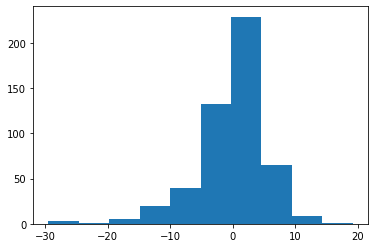

In [16]:
plt.hist(linear_regression.predict(X)-y, bins=10)
plt.show()

## Loss function and gradient decent

Recall that our objective solving a regression problem is to minimize a loss function, that has the following form:

$$ L(a,b) = \sum_{i=1}^N (y_i - f_{a,b}(x_i))^2$$

In the reading material we discussed a method for solving such optimisation problem called gradient descent. 

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. Let's briefly outline the steps of this algorithm, for more details don't doubt to check the corresponding section.

1. Pick a learning rate $l_r$
2. Pick a starting point $(a,b)$
3. Compute the gradient of $L$ at $(a,b)$
4. Update the new point $(a,b)$ according to the gradient descent update rule with the learning rate $l_r$.
5. Go to 3 if the stopping rule is not satisfied.

We usually set some criteria for when to stop this algorithm (stopping rule), usually it is a criterion for how much we are moving (below some threshold $\tau$) or it is a set number of iterations.

### Linear regression implementation from scratch

You have probably noticed how simple a linear regression model can be implemented using scikit-learn. 

Now let's take a look to an implementation of a linear regression from scratch to understand better the optimization that is going on. Take a moment to go through the function below. 

In [17]:
class LinearRegressionUsingGD:
    """
    Linear regression using gradient descent.
    
    Parameters
    ----------
    learning_rate : float
        Learning rate
    num_iterations : int
        Number of passes over the training set
        
    Attributes
    ----------
    weights_ : weights after fitting the model
    cost_ : total error of the model after each iteration
    
    """

    def __init__(self, learning_rate = 0.005, num_iterations = 1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        """
        Fit the model
        
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training data
        y : array-like, shape = [n_samples, n_targets]
            Target values
            
        Returns
        -------
        self : returns an instance of self
        
        """

        self.cost_ = []
        
        X_nparray = X.values
        X_nparray = np.c_[np.ones(X_nparray.shape[0]), X_nparray]
        y_nparray = y.values
        y_nparray = np.expand_dims(y_nparray, axis=1)
        
        self.weights_ = np.zeros((X_nparray.shape[1], 1))
        n_samples = X_nparray.shape[0]

        for _ in range(self.num_iterations):
            y_prediction = np.dot(X_nparray, self.weights_)
            residuals = y_prediction - y_nparray
            gradient_vector = np.dot(X_nparray.T, residuals)
            self.weights_ -= (self.learning_rate/n_samples)*gradient_vector
            cost = np.sum(residuals**2)/(2*n_samples)
            self.cost_.append(cost)
        return self

    def predict(self, X):
        """ 
        Predict the value after the model has been trained.
        
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Test data
            
        Returns
        -------
        Predicted value
        
        """
        
        X_nparray = X.values
        X_nparray = np.c_[np.ones(X_nparray.shape[0]), X_nparray]
        
        prediction_ = np.dot(X_nparray, self.weights_)
        prediction = []
        for i in range(prediction_.shape[0]):
            prediction.append(prediction_[i][0])
            
        return prediction

### Q3 (multiple choice):

Based on the above implementation, select the correct statements about `learning_rate` and `num_iteration`:
1. Larger `learning_rate` avoids overfitting of the function. While `num_iteration` is used to bias the model. 
2. Larger `learning_rate` can have the effect of oscillating around the minimum if unlucky. 
3. If one has a smaller `learning_rate` one usually has to let `num_iteration` be bigger. 
4. `num_iteration` is the stopping criteria in the above implementation. 
5. Smaller `num_iteration` should also mean smaller `learning_rate`. 

In [18]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q3_answer = [6,7]
### START ANSWER HERE ###
Q3_answer = [2,3,4]
### END ANSWER HERE ###

In [19]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q3_answer))=='8dd6d5594e1f0c323aff853c6de15c73':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [20]:
# nbgrader cell


Now let us try the above linear regression model. First we create a model and then fit it to the training data. 

In [21]:
linear_regression_from_scratch = LinearRegressionUsingGD()
linear_regression_from_scratch.fit(X_train, y_train)

Let's look at the resulting coefficients and intersepts of both models and compare them.

In [22]:
print('Linear regression model from scratch intercept term: {}'.format(linear_regression_from_scratch.weights_[0][0])) 
print('sklearns linear regression model intercept: {}'.format(linear_regression.intercept_))
print('Linear regression model from scratch coefficients: {}'.format(linear_regression_from_scratch.weights_[1:].ravel()))
print('sklearns coefficients: {}'.format(linear_regression.coef_))

Linear regression model from scratch intercept term: 0.47917481668065676
sklearns linear regression model intercept: -5.848568373762454
Linear regression model from scratch coefficients: [-0.64181111  4.81577726]
sklearns coefficients: [-0.58080885  5.69323403]


We see that the coefficients seem to be around the same order, while the intercept terms are not. 

Now let's take a look to the loss function of the second model. 

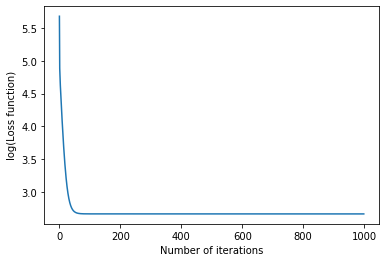

In [23]:
num_iterations = linear_regression_from_scratch.num_iterations + 1

fig, axes = plt.subplots()
axes.plot(np.log(linear_regression_from_scratch.cost_))
axes.set_xlabel('Number of iterations')
axes.set_ylabel('log(Loss function)');

We see that the value of the loss function goes down with more iterations.

Let's try to set the number of iterations in a new `LinearRegressionUsingGD` instance to receive the same (close) coefficients and intercept as sklearn's model. Feel free to play with `num_iterations`! 

**Important note!**

In the cells below you will see ### START CODE HERE ### and ### END CODE HERE ### flags. These are dummies that are made in order to allow you to make changes in these cells. Don't worry about these flags.

In [24]:
### START ANSWER HERE ###
### END ANSWER HERE ###

linear_regression_from_scratch_2 = LinearRegressionUsingGD(learning_rate=0.005, num_iterations=1000) 
linear_regression_from_scratch_2.fit(X_train, y_train)
print('Intercept:', linear_regression_from_scratch_2.weights_[0][0])
print('Coefficients: %f %f ' %(linear_regression_from_scratch_2.weights_[1:].ravel()[0], linear_regression_from_scratch_2.weights_[1:].ravel()[1]))
print('(sklearn model intercept and coefficients: %f %f %f )' %(linear_regression.intercept_, linear_regression.coef_[0], linear_regression.coef_[1]))

Intercept: 0.47917481668065676
Coefficients: -0.641811 4.815777 
(sklearn model intercept and coefficients: -5.848568 -0.580809 5.693234 )


The take away in the above exercise is that it can be very difficult to implement an efficient optimization algorithm, plus don't just trust the default settings. Taking the right step size, having enough iterations etc, is itself a large part in building a good model and should not be overlooked.

## Mean Absolute Error

In the reading material we introduced several measurements for regression models' performance. 
Let's measure the performance of our models to predict the price on the test set. First we will use Mean Absolute Error (MAE).

### Q4:

Using scikit-learn compute the mean absolute errors of the linear regression models, implemented above.

**Hint:**
* import the necessary module
* compute MAE for `linear_regression` model for test set `X_test` (use `mae_linear_regression = `)
* compute MAE for `linear_regression_from_scratch` model for test set `X_test` using prediction method `linear_regression_from_scratch.predict(X_test)`  (use `mae_linear_regression_from_scratch = `)

In [25]:
# (approx. 3 lines of code)
### START ANSWER HERE ###
from sklearn.metrics import mean_absolute_error
mae_linear_regression = mean_absolute_error(y_test, linear_regression.predict(X_test))
mae_linear_regression_from_scratch = mean_absolute_error(y_test, linear_regression_from_scratch.predict(X_test))
### END ANSWER HERE ###

In [26]:
print('MAE sklearn linear regression: ', mae_linear_regression)    
print('MAE linear regression from scratch: ', mae_linear_regression_from_scratch)

MAE sklearn linear regression:  4.236753293527478
MAE linear regression from scratch:  4.269459847470465


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> mae_linear_regression</td> 
        <td> 4.236753293527478
        </td> 
    </tr>
    <tr> 
        <td> mae_linear_regression_from_scratch</td> 
        <td> 4.269459847470465
        </td> 
    </tr>
</table> 

You can see from MAE that the predictions from both models are very close to each other.

In [ ]:
# nbgrader cell


# Good job!